# Importing Libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt




# Importing Dataset and reducing the dimensions and no. of classes

In [ ]:
'''from google.colab import files
uploaded=files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['All-seasons.csv']))'''
df=pd.read_csv('All-seasons.csv')

In [ ]:
df.describe()

,Season,Episode,Character,Line
count,70896,70896,70896,70896
unique,19,19,3950,64301
top,2,10,Cartman,What?\n
freq,6416,5271,9774,361


In [ ]:
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [ ]:
from collections import Counter
c= Counter(df.Character)
print(len(c))
for key,val in c.items():
  print("{0:20}{1:20}".format(key,val))


3950
Stan                                7680
Kyle                                7099
Chef                                 917
Mrs. Garrison                        282
Cartman                             9774
Mayor McDaniels                      100
Jimbo                                556
Gerald                               626
Mr. Mackey                           633
A Man                                  5
A Sign-Holder                          1
Randy                               2467
Patrons                                5
Townsfolk                             41
Kenny                                881
A Boy                                 13
Clyde                                317
The Boys                             111
Det. Jarvis                            9
Butters                             2602
The Class                             13
Butler                                36
Head Adventurer                        2
Club Members                           1
Mr. Connoll


This dataset contains dialogues and speakers from season 9 and 10 of the animated series south park.
The season and the episode are irrelevant to our task, i.e., to predict the speaker from the dialogue.


In [ ]:
classes=['Cartman','Stan','Kyle','Butters','Randy','Mr. Garrison','Kenny','Chef']
data=df.loc[df['Character'].isin(classes)]
data=data.iloc[:,2:4]
print(data.head(10))
shape=data.shape
print(shape)

   Character                                               Line
0       Stan         You guys, you guys! Chef is going away. \n
1       Kyle                        Going away? For how long?\n
2       Stan                                         Forever.\n
3       Chef                                  I'm sorry boys.\n
4       Stan  Chef said he's been bored, so he joining a gro...
5       Chef                                             Wow!\n
7       Chef     What's the meaning of life? Why are we here?\n
9    Cartman  I'm gonna miss him.  I'm gonna miss Chef and I...
10      Stan  Dude, how are we gonna go on? Chef was our fuh...
17     Randy  Good-bye, Chef! Have a great time with the Sup...
(32422, 2)


<BarContainer object of 8 artists>

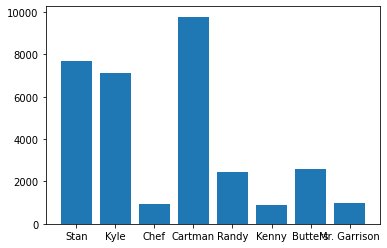

In [ ]:
c=Counter(data.Character)
plt.bar(c.keys(),c.values())

# Creating Corpus

function for obtaining the part of speech for lemmatisation

In [ ]:
#nltk.download('popular')
from nltk import wordnet
def get_wordnet_pos(tag):
 
    if tag.startswith('J'):
        return "a"
    elif tag.startswith('V'):
        return "v"
    elif tag.startswith('N'):
        return "n"
    elif tag.startswith('R'):
        return "r"
    else:
        return "n"

cleaning the texts and creating the corpus

In [ ]:
#nltk.download('popular')
corpus=[]
from nltk.stem import WordNetLemmatizer
lemmatiser=WordNetLemmatizer()
for dialog in data.Line:
    dialog=nltk.word_tokenize(dialog)
    for i in range(0,len(dialog)):
        dialog[i]= re.sub('\'s','is',dialog[i])
        dialog[i]=re.sub('\'m','am',dialog[i])
        dialog[i]=re.sub('n\'t','not',dialog[i])
        dialog[i]=re.sub('\'ve','have',dialog[i])
        dialog[i]=re.sub('[^a-zA-Z]',' ',dialog[i])
        dialog[i]=dialog[i].lower()
    pos=nltk.pos_tag(dialog)
    dialog=[]
    for word,tag in pos:
        if (word is not ' '):
            l=lemmatiser.lemmatize(word,get_wordnet_pos(tag))
            dialog.append(l)
    dialog=' '.join(dialog)
    corpus.append(dialog)

In [ ]:
for w in corpus:
  print("\n",w)

Streaming output truncated to the last 5000 lines.
 oh   but that be the problem   those goobacks be take our job  

 oh my god   stan marsh   how dare you use that time bashing slur    

 well dude   they be take people be job away  

 they  re only take the small menial job that nobody else really want to do  

 i want my job  

 hey   stanley   you need to understand something   those people from the future have have a hard life   where they come from be dirty and overpopulated and poor   you ca not even imagine the kind of depression they come from   so   for u   who have everything sooo good   to judge them   be wrong   do you understand     next time you think about call them goobacks   you might just wan na stop for a second and think about how crappy the future really be  

 timecist  

 people from the future   right   get it  

 all right   good   now   let be all go eat some of mrs  gruhd be great future cooking  

 what    

 dude   hold on   this be bullcrap   if they wan 

Encoding Target Variable

In [ ]:
y=data['Character']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_


array(['Butters', 'Cartman', 'Chef', 'Kenny', 'Kyle', 'Mr. Garrison',
       'Randy', 'Stan'], dtype=object)

# Creating the Bag of Words model

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(ngram_range=(3,3),max_features=15000)
x = tv.fit_transform(corpus).toarray()


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


# training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
rf=MultinomialNB()
from sklearn.model_selection import cross_val_predict, cross_val_score
score=np.mean(cross_val_score(rf,x,y,cv=kfold))



In [ ]:
print(score)
y_pred=cross_val_predict(rf,x,y,cv=kfold)

0.342236728139773
